<a href="https://colab.research.google.com/github/eladorpBG/ML_assignment3/blob/main/Keras_ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras Implementation**

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import initializers

# Load the MNIST dataset (train + test)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine the train and test datasets to create the full dataset
full_data_images = np.concatenate([train_images, test_images], axis=0)
full_data_labels = np.concatenate([train_labels, test_labels], axis=0)

# Normalize the images to the range [0, 1]
full_data_images = ((full_data_images.astype('float32') / 255.0) - .5) * 2

# Flatten the images to 1D vector (28x28 = 784)
full_data_images = full_data_images.reshape(full_data_images.shape[0], 28 * 28)

# Convert labels to one-hot encoding
full_data_labels = to_categorical(full_data_labels, 10)

# Split the full dataset into train (70%) and test (30%)
train_size = int(0.7 * full_data_images.shape[0])
test_size = full_data_images.shape[0] - train_size

train_images = full_data_images[:train_size]
train_labels = full_data_labels[:train_size]
test_images = full_data_images[train_size:]
test_labels = full_data_labels[train_size:]

# Split the training set into train and validation (70% train, 30% test)
val_size = 5000
train_images, val_images = train_images[:-val_size], train_images[-val_size:]
train_labels, val_labels = train_labels[:-val_size], train_labels[-val_size:]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.metrics import AUC

# Define a custom initializer
initializer = initializers.RandomNormal(mean=0.0, stddev=0.1)

# Build the model
model = models.Sequential()

# Add the first hidden layer with 500 neurons and sigmoid activation
model.add(layers.Dense(units=500, input_dim=28*28, activation='sigmoid', kernel_initializer=initializer))

# Add the second hidden layer with 500 neurons and sigmoid activation
model.add(layers.Dense(units=500, activation='sigmoid', kernel_initializer=initializer))

# Add the output layer with 10 neurons and softmax activation
model.add(layers.Dense(units=10, activation='sigmoid', kernel_initializer=initializer))

# Compile the model
optimizer = SGD(learning_rate=0.1, momentum=0.0, nesterov=False) # Use stochastic gradient descent like in the manual implementation
model.compile(loss='mse', optimizer=optimizer, metrics=[AUC()])


In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=25,
    batch_size=200
)

# Evaluate the model on the test set
test_loss, test_auc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc * 100:.2f}%")

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - auc_1: 0.5507 - loss: 0.1077 - val_auc_1: 0.6502 - val_loss: 0.0875
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc_1: 0.6825 - loss: 0.0867 - val_auc_1: 0.7289 - val_loss: 0.0842
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - auc_1: 0.7568 - loss: 0.0832 - val_auc_1: 0.7991 - val_loss: 0.0801
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_1: 0.8214 - loss: 0.0790 - val_auc_1: 0.8486 - val_loss: 0.0756
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - auc_1: 0.8640 - loss: 0.0745 - val_auc_1: 0.8952 - val_loss: 0.0711
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - auc_1: 0.8992 - loss: 0.0700 - val_auc_1: 0.9170 - val_loss: 0.0668
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - auc_1: 0.9199 - loss: 0.0655 - val_auc_1: 0.9335 - val_loss: 0.0627
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - auc_1: 0.9329 - loss: 0.0618 - val_auc_1: 0.9409 - val_loss: 0.0590
Epoch 9/25
220/2

Plot the AUC over epochs

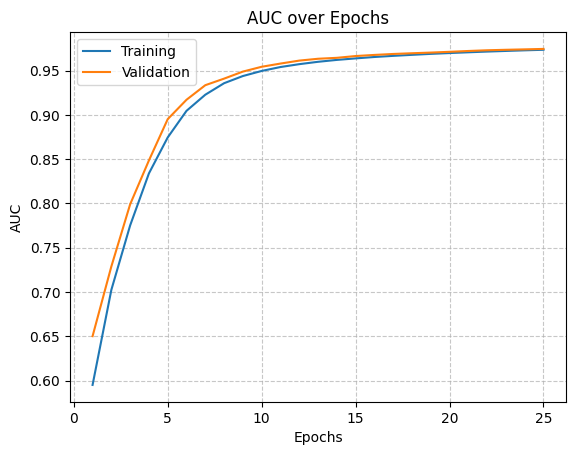

In [ ]:
import matplotlib.pyplot as plt

# Extract the AUC values for training and validation
train_auc = history.history['auc_1']
val_auc = history.history['val_auc_1']

epochs = range(1, len(val_auc) + 1)

# Plot the AUC values for both validation and test sets
plt.plot(epochs, train_auc, label='Training')
plt.plot(epochs, val_auc, label='Validation')

# Labeling the plot
plt.title('AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.grid(alpha=0.7, linestyle='--')
plt.legend()
plt.show()